In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\tanee\Downloads\archive (21)\personality_dataset.csv")

## DATASET

In [3]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## EXPLORING DATASET

In [4]:
df.shape

(2900, 8)

2900 rows present in the dataset with 8 feature columns

In [5]:
df.duplicated().sum()

388

In [6]:
df.drop_duplicates(inplace=True)

388 duplicate rows are present in the original dataset which have been dropped

In [7]:
df.shape

(2512, 8)

2512 unique rows present in the modified dataset 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2451 non-null   float64
 1   Stage_fear                 2439 non-null   object 
 2   Social_event_attendance    2451 non-null   float64
 3   Going_outside              2447 non-null   float64
 4   Drained_after_socializing  2461 non-null   object 
 5   Friends_circle_size        2437 non-null   float64
 6   Post_frequency             2449 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [9]:
df.isnull().sum()

Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64

In all columns other than personality, null or missing values are present

In [10]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2451.000000,2451.000000,2447.000000,2437.000000,2449.000000
mean,4.209302,4.219094,3.203923,6.607304,3.831360
std,3.446242,2.909053,2.245668,4.324444,2.949698
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


DEALING WITH MISSING VALUES

Text(0.5, 0, 'Time spent alone')

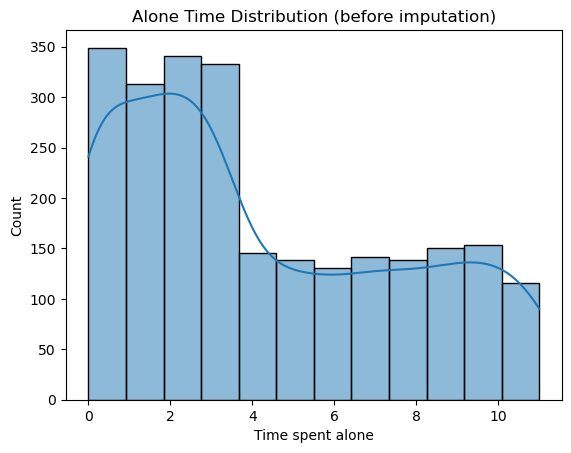

In [11]:
sns.histplot(data=df,x='Time_spent_Alone',bins=12,kde=True)
plt.title("Alone Time Distribution (before imputation)")
plt.xlabel("Time spent alone")

In [12]:
df['Time_spent_Alone'].skew()

0.5325773138428053

Replacing missing values in the column with the mode value

In [13]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mode()[0],inplace=True)

In [14]:
df['Time_spent_Alone'].skew()

0.5561315354584797

Text(0.5, 0, 'Time spent alone')

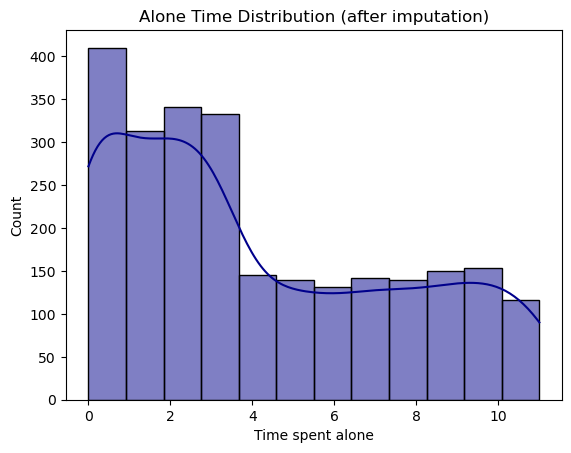

In [15]:
sns.histplot(data=df,x='Time_spent_Alone',bins=12,kde=True,color='darkblue')
plt.title("Alone Time Distribution (after imputation)")
plt.xlabel("Time spent alone")

In [16]:
df['Stage_fear'].value_counts()

Stage_fear
No     1348
Yes    1091
Name: count, dtype: int64

Replacing missing values in the column with the mode value

In [17]:
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0],inplace=True)

In [18]:
df['Stage_fear'].value_counts()

Stage_fear
No     1421
Yes    1091
Name: count, dtype: int64

Text(0.5, 0, 'Stage fear')

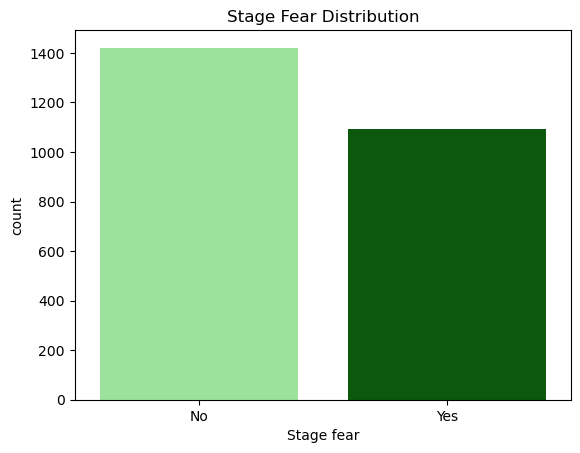

In [19]:
sns.countplot(data=df,x='Stage_fear',hue='Stage_fear',
             palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.title("Stage Fear Distribution")
plt.xlabel("Stage fear")

Text(0.5, 0, 'Social Event Attendance')

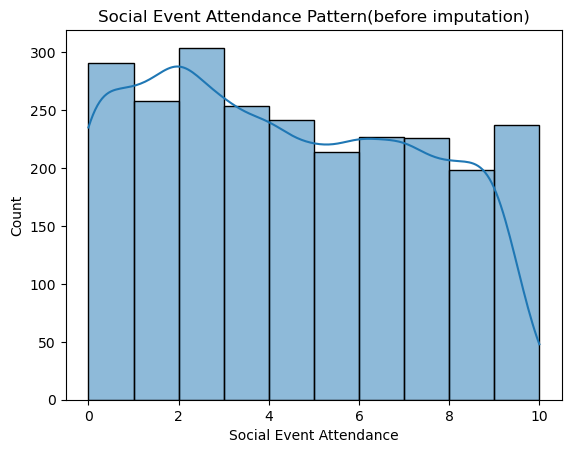

In [20]:
sns.histplot(data=df,x='Social_event_attendance',bins=10,kde=True)
plt.title("Social Event Attendance Pattern(before imputation)")
plt.xlabel("Social Event Attendance")

In [21]:
df['Social_event_attendance'].skew()

0.16217574123129694

Replacing missing values in the column with the mean value

In [22]:
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(),inplace=True)

In [23]:
df['Social_event_attendance'].skew()

0.16417899512769063

Text(0.5, 0, 'Social Event Attendance')

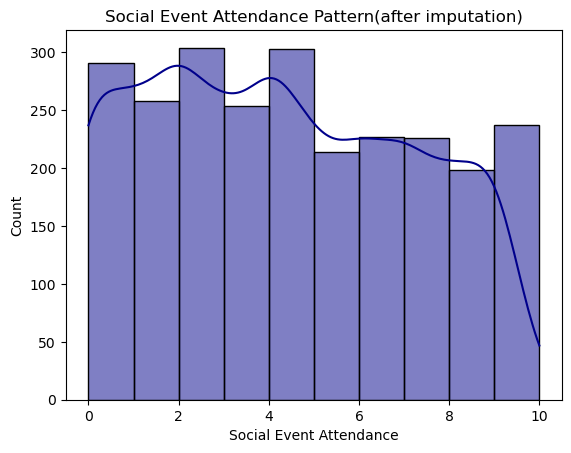

In [24]:
sns.histplot(data=df,x='Social_event_attendance',bins=10,kde=True,color='darkblue')
plt.title("Social Event Attendance Pattern(after imputation)")
plt.xlabel("Social Event Attendance")

Text(0.5, 0, 'Going Outside')

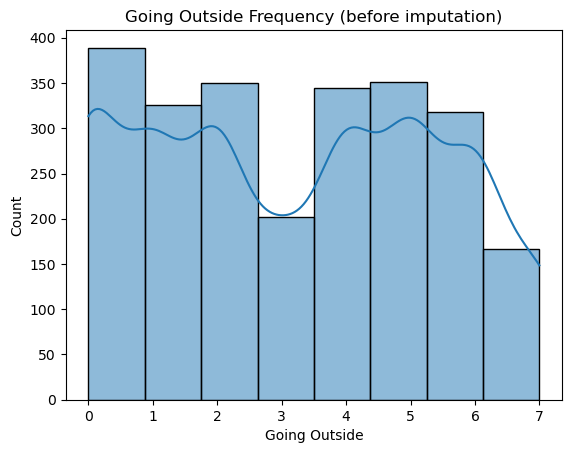

In [25]:
sns.histplot(data=df,x='Going_outside',bins=8,kde=True)
plt.title("Going Outside Frequency (before imputation)")
plt.xlabel("Going Outside")

In [26]:
df['Going_outside'].skew()

0.050506279684672854

Replacing missing values in the column with the mean value

In [27]:
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(),inplace=True)

In [28]:
df['Going_outside'].skew()

0.050506279684672854

Text(0.5, 0, 'Going Outside')

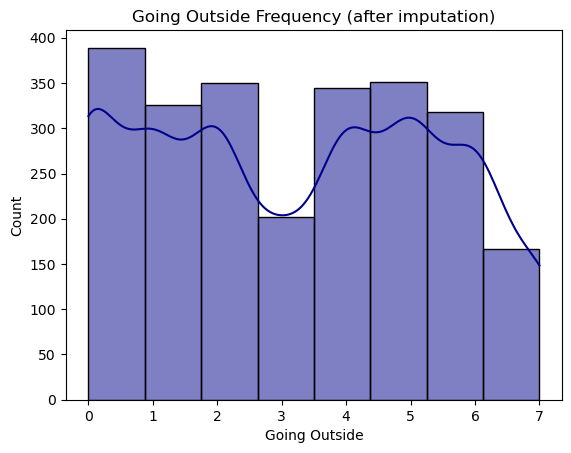

In [29]:
sns.histplot(data=df,x='Going_outside',bins=8,kde=True,color='darkblue')
plt.title("Going Outside Frequency (after imputation)")
plt.xlabel("Going Outside")

In [30]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1372
Yes    1089
Name: count, dtype: int64

Replacing missing values in the column with the mode value

In [31]:
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0],inplace=True)

In [32]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1423
Yes    1089
Name: count, dtype: int64

Text(0.5, 0, 'Drained after socializing')

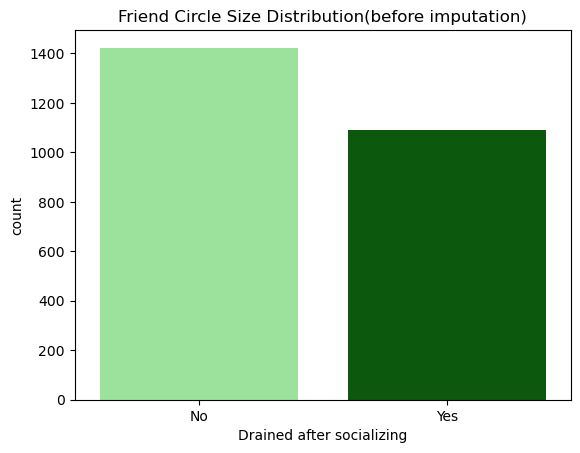

In [33]:
sns.countplot(data=df,x='Drained_after_socializing',hue='Drained_after_socializing',
             palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.title("Friend Circle Size Distribution(before imputation)")
plt.xlabel("Drained after socializing")

Text(0.5, 0, 'Friends circle size')

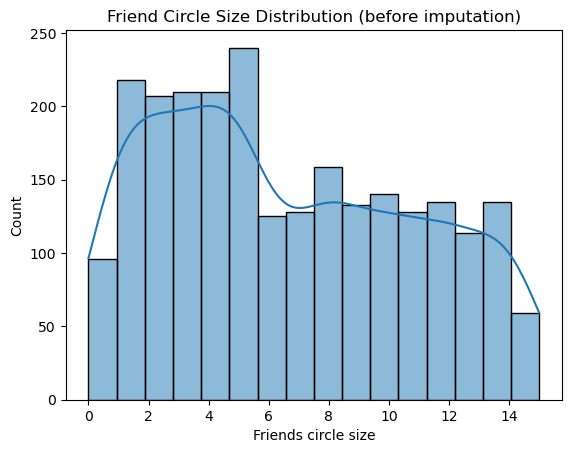

In [34]:
sns.histplot(data=df,x='Friends_circle_size',bins=16,kde=True)
plt.title("Friend Circle Size Distribution (before imputation)")
plt.xlabel("Friends circle size")

In [35]:
df['Friends_circle_size'].skew()

0.2945378445181754

Replacing missing values in the column with the mode value

In [36]:
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(),inplace=True)

In [37]:
df['Friends_circle_size'].skew()

0.29903028074559124

Text(0.5, 0, 'Friends circle size')

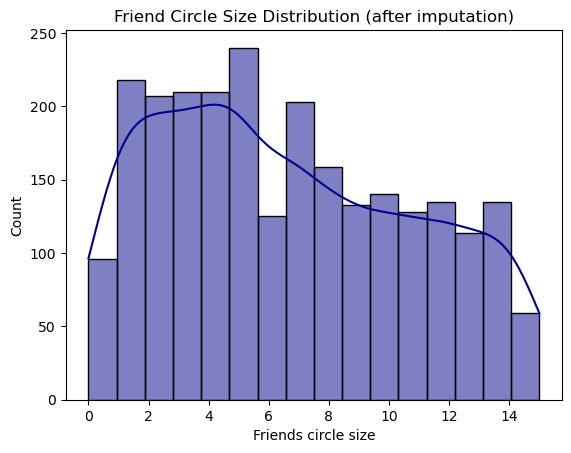

In [38]:
sns.histplot(data=df,x='Friends_circle_size',bins=16,kde=True,color='darkblue')
plt.title("Friend Circle Size Distribution (after imputation)")
plt.xlabel("Friends circle size")

Text(0.5, 0, 'Post frequency')

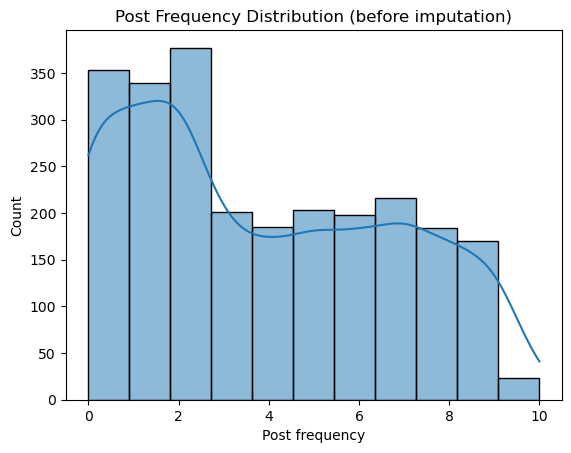

In [39]:
sns.histplot(data=df,x='Post_frequency',bins=11,kde=True)
plt.title("Post Frequency Distribution (before imputation)")
plt.xlabel("Post frequency")

In [40]:
df['Post_frequency'].skew()

0.34151199025764617

In [41]:
df['Post_frequency'].fillna(df['Post_frequency'].mode()[0],inplace=True)

In [42]:
df['Post_frequency'].skew()

0.38188505961220626

Text(0.5, 0, 'Post frequency')

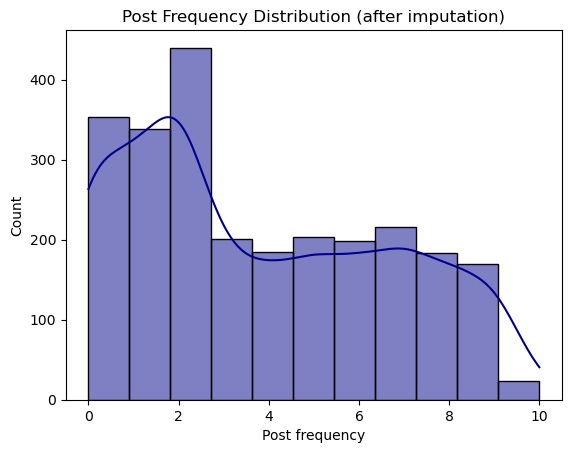

In [43]:
sns.histplot(data=df,x='Post_frequency',bins=11,kde=True,color='darkblue')
plt.title("Post Frequency Distribution (after imputation)")
plt.xlabel("Post frequency")

In [44]:
df['Personality'].value_counts()

Personality
Extrovert    1417
Introvert    1095
Name: count, dtype: int64

Text(0.5, 0, 'Personality')

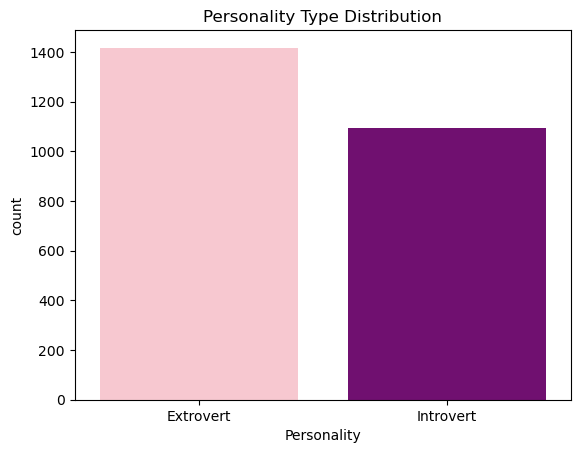

In [45]:
sns.countplot(data=df,x='Personality',hue='Personality',
             palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=False)
plt.title("Personality Type Distribution")
plt.xlabel("Personality")

There is a split of 43-56% between introverts and extroverts

## MODIFIED DATASET

In [46]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,2.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## EXPLORATORY DATA ANALYSIS

<Axes: >

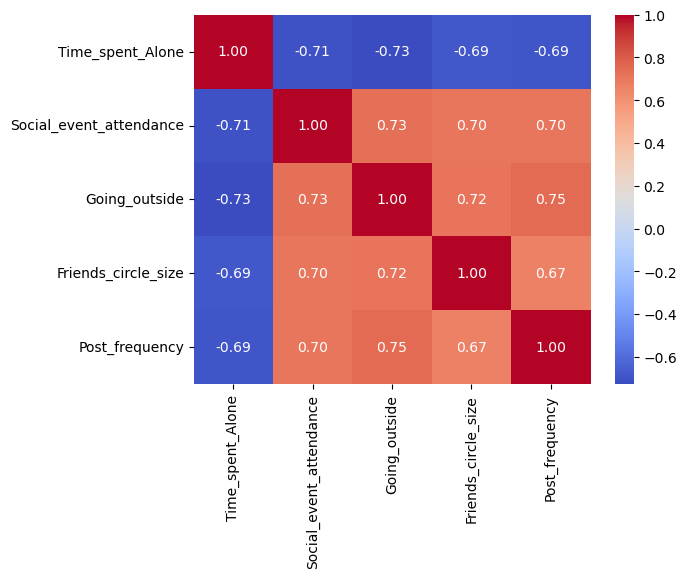

In [47]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f')

Text(0.5, 0, 'Time spent alone')

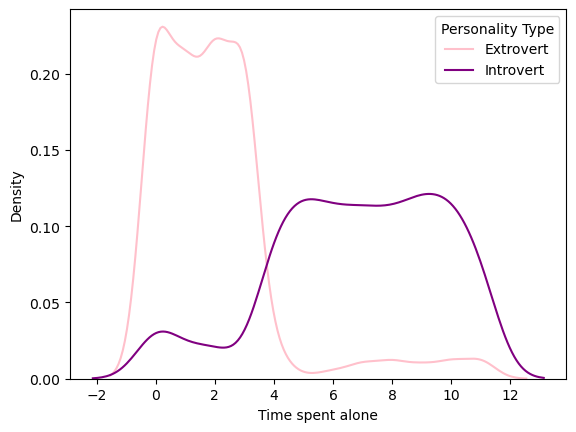

In [48]:
sns.kdeplot(df[df['Personality']=='Extrovert']['Time_spent_Alone'],label='Extrovert',color='pink')
sns.kdeplot(df[df['Personality']=='Introvert']['Time_spent_Alone'],label='Introvert',color='purple')
plt.legend(title='Personality Type')
plt.xlabel('Time spent alone')

Text(0, 0.5, 'Time spent alone')

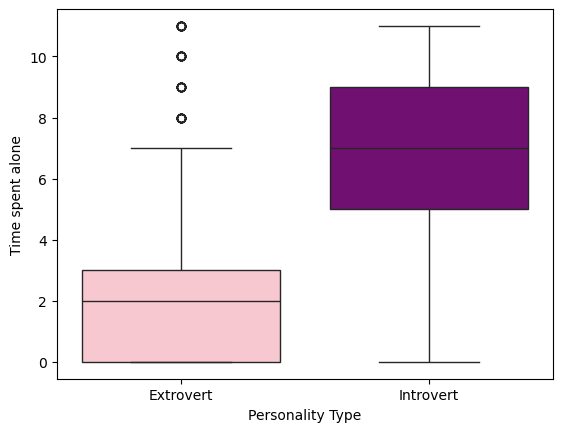

In [49]:
sns.boxplot(data=df,x='Personality',y='Time_spent_Alone',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=False)
plt.xlabel("Personality Type")
plt.ylabel("Time spent alone")

In [50]:
df[(df['Personality']=='Extrovert')]['Time_spent_Alone'].mean()

2.0148200423429783

In [51]:
df[(df['Personality']=='Introvert')]['Time_spent_Alone'].mean()

6.814611872146119

Extroverts are spending lesser time alone as compared to introverts. On average,they stay alone only for 2.02 hours in contrast to 6.8 hours alone time of introverts

Text(0.5, 0, 'Stage fear')

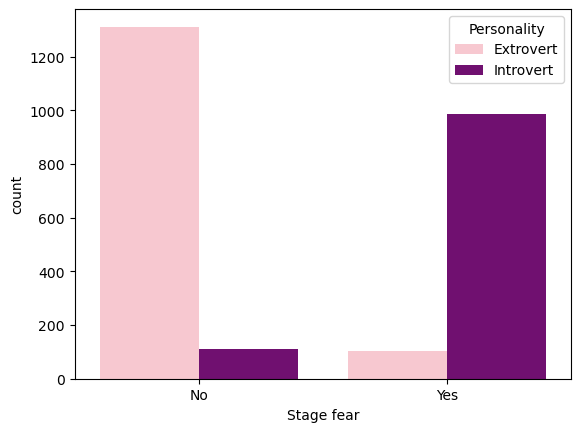

In [52]:
sns.countplot(data=df,x='Stage_fear',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.xlabel('Stage fear')

In [53]:
df['Stage_fear'].value_counts()

Stage_fear
No     1421
Yes    1091
Name: count, dtype: int64

In [54]:
df[(df['Stage_fear']=='No') & (df['Personality']=='Extrovert')].shape

(1312, 8)

In [55]:
df[(df['Stage_fear']=='Yes') & (df['Personality']=='Introvert')].shape

(986, 8)

92% of people who have stage fear are extroverts while only 10 % of people with no stage fear are introverts

Text(0.5, 0, 'Social event attendance')

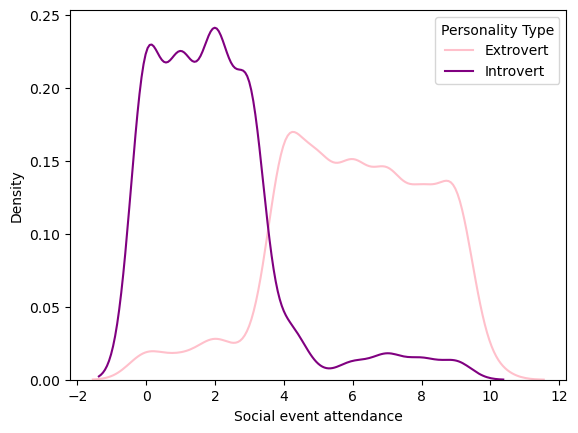

In [56]:
sns.kdeplot(df[df['Personality']=='Extrovert']['Social_event_attendance'],label='Extrovert',color='pink')
sns.kdeplot(df[df['Personality']=='Introvert']['Social_event_attendance'],label='Introvert',color='purple')
plt.legend(title='Personality Type')
plt.xlabel('Social event attendance')

In [57]:
df[df['Personality']=='Extrovert']['Social_event_attendance'].mean()

5.981040676727515

In [58]:
df[df['Personality']=='Introvert']['Social_event_attendance'].mean()

1.9390229316521632

Text(0, 0.5, 'Social event attendance')

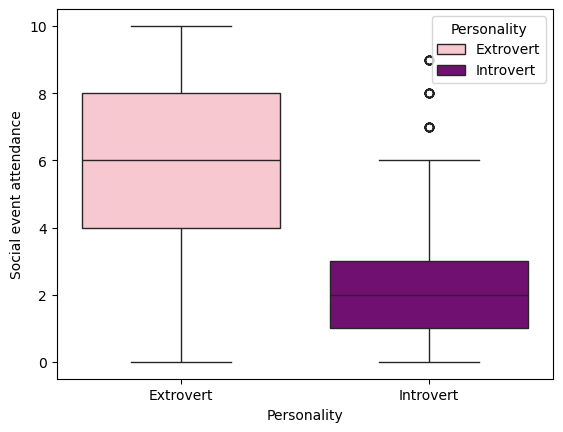

In [59]:
sns.boxplot(data=df,x='Personality',y='Social_event_attendance',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.ylabel("Social event attendance")

Introverts tend to be less present in the social events. However there are certain people who are introvert but yet attending comparatively more number of social events

Text(0.5, 0, 'Friends circle size')

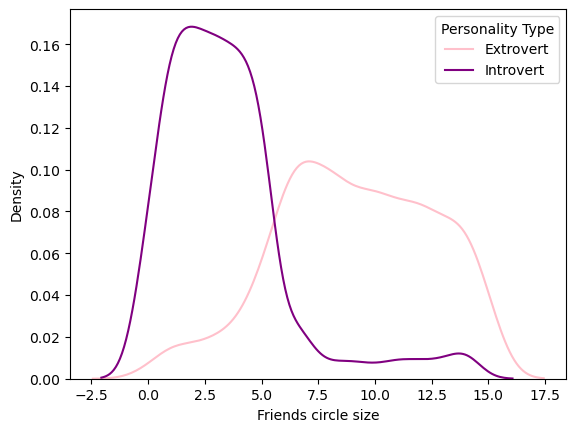

In [60]:
sns.kdeplot(df[df['Personality']=='Extrovert']['Friends_circle_size'],label='Extrovert',color='pink')
sns.kdeplot(df[df['Personality']=='Introvert']['Friends_circle_size'],label='Introvert',color='purple')
plt.legend(title='Personality Type')
plt.xlabel('Friends circle size')

Text(0, 0.5, 'Friends circle size')

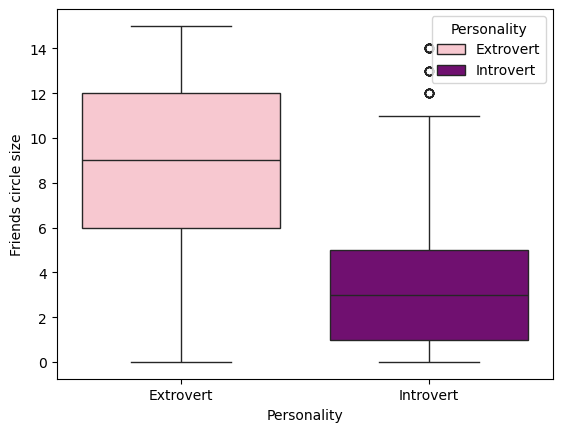

In [125]:
sns.boxplot(data=df,x='Personality',y='Friends_circle_size',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.ylabel("Friends circle size")

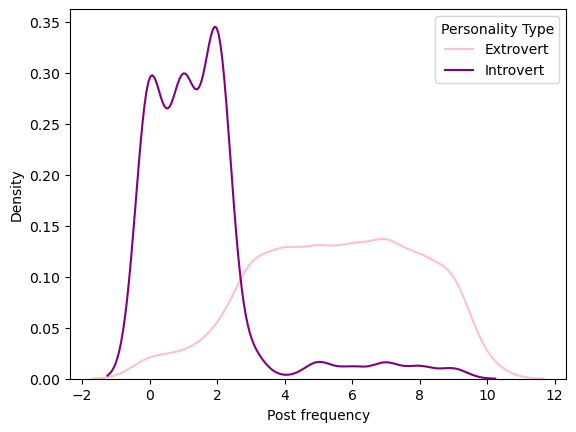

In [62]:
sns.kdeplot(df[df['Personality']=='Extrovert']['Post_frequency'],label='Extrovert',color='pink')
sns.kdeplot(df[df['Personality']=='Introvert']['Post_frequency'],label='Introvert',color='purple')
plt.xlabel("Post frequency")
plt.legend(title='Personality Type')

Text(0, 0.5, 'Post frequency')

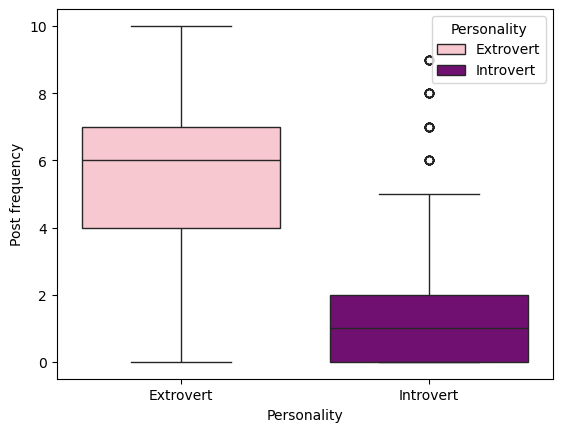

In [126]:
sns.boxplot(data=df,x='Personality',y='Post_frequency',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.ylabel("Post frequency")

A similar trend as social event attendance is observed for post frequency and friend circle size

Text(0.5, 0, 'Going outside')

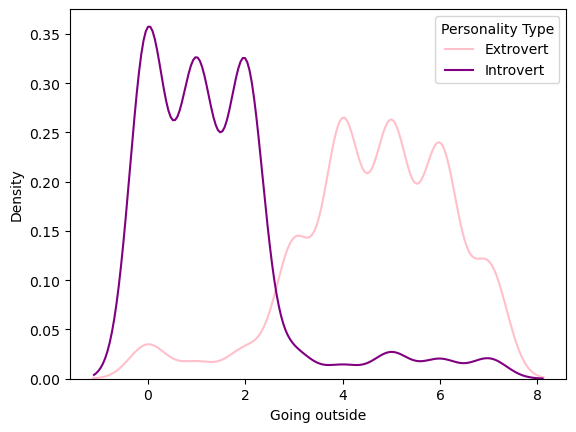

In [64]:
sns.kdeplot(df[df['Personality']=='Extrovert']['Going_outside'],label='Extrovert',color='pink')
sns.kdeplot(df[df['Personality']=='Introvert']['Going_outside'],label='Introvert',color='purple')
plt.legend(title='Personality Type')
plt.xlabel('Going outside')

Text(0, 0.5, 'Going outside')

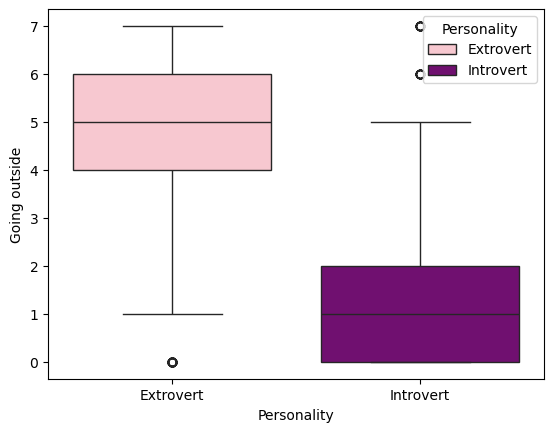

In [65]:
sns.boxplot(data=df,x='Personality',y='Going_outside',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.ylabel("Going outside")

In going outside column, the trend is similar to the above three feature but however there are some extroverts who are rarely going outside

Text(0.5, 0, 'Drained after socializing')

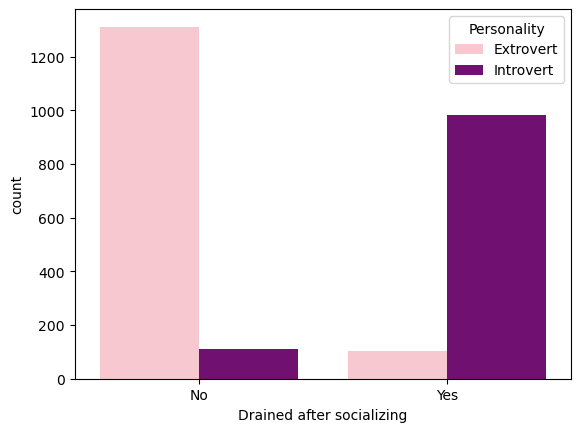

In [66]:
sns.countplot(data=df,x='Drained_after_socializing',hue='Personality',palette={'Extrovert': 'pink' , 'Introvert': 'purple'},
             legend=True)
plt.xlabel("Drained after socializing")

In [67]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1423
Yes    1089
Name: count, dtype: int64

In [68]:
df[(df['Drained_after_socializing']=='Yes') & (df['Personality']=='Introvert')].shape

(984, 8)

In [69]:
984/1089

0.9035812672176309

In [70]:
df[(df['Drained_after_socializing']=='No') & (df['Personality']=='Introvert')].shape

(111, 8)

In [71]:
111/1423

0.07800421644413212

People who get drained after socialising are 90% those who are extroverts while those who do not get drained only 7.8% of those are extroverts

In [72]:
df['Time_spent_Alone'] = df['Time_spent_Alone'].astype(int)
df['Social_event_attendance'] = df['Social_event_attendance'].astype(int)

Text(0, 0.5, 'Alone time')

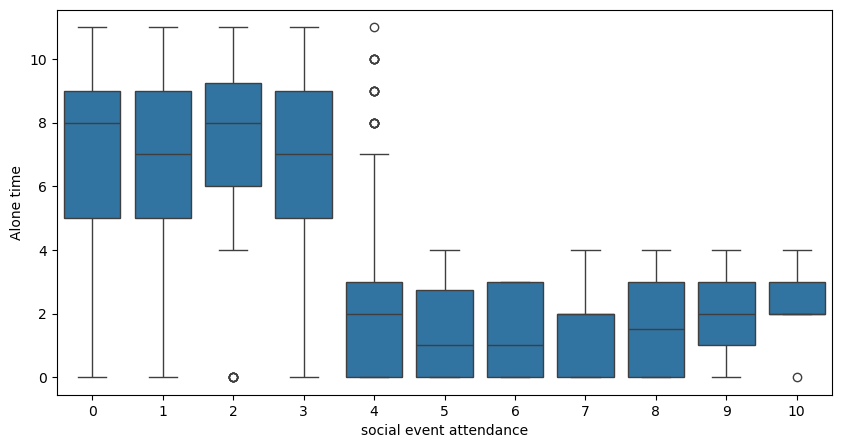

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y='Time_spent_Alone',x='Social_event_attendance')
plt.xlabel("social event attendance")
plt.ylabel("Alone time")

In [74]:
df['Social_event_attendance'].mean()

4.213773885350318

In [75]:
df[df['Social_event_attendance']>4.2]['Time_spent_Alone'].mean()

1.5027223230490019

Text(0, 0.5, 'Social event attendance')

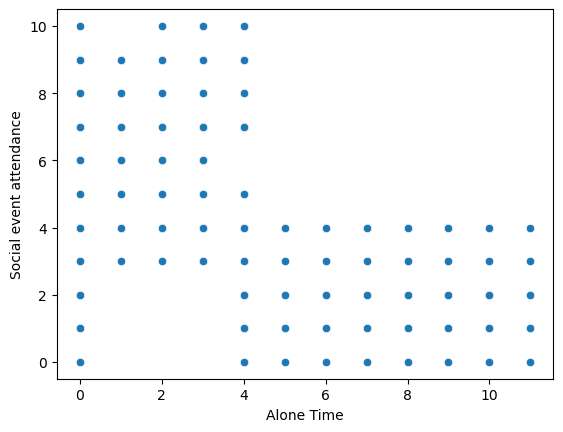

In [76]:
sns.scatterplot(data=df,x='Time_spent_Alone',y='Social_event_attendance')
plt.xlabel('Alone Time')
plt.ylabel('Social event attendance')

In [77]:
df[(df['Social_event_attendance']>4) & (df['Time_spent_Alone']>4)].shape

(0, 8)

People attending more than average number of social events have an average alone time of just 1.5 hours. There is no person who is attending over 4 events and spending over four hours alone time as well

Text(0, 0.5, 'Alone Time')

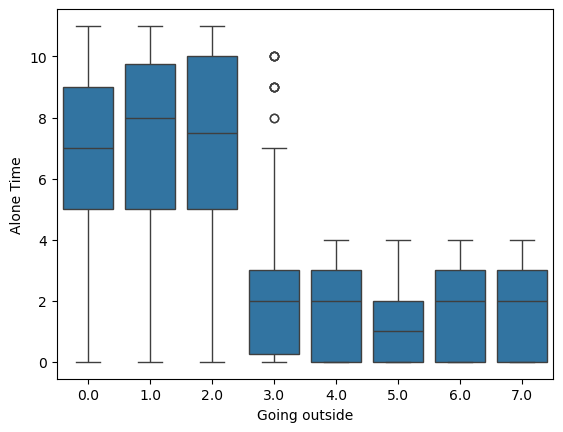

In [78]:
sns.boxplot(data=df,y='Time_spent_Alone',x='Going_outside')
plt.xlabel("Going outside")
plt.ylabel("Alone Time")

In [79]:
df['Going_outside'].mean()

3.2039231712300777

In [80]:
df[df['Going_outside']<=3.2]['Time_spent_Alone'].mean()

6.50828729281768

In [81]:
df[df['Going_outside']>3.2]['Time_spent_Alone'].mean()

1.511864406779661

Those who tend to go outside more than the average times of the group are spending lesser alone time. They just spend on an average 1.5 hours alone 

In [82]:
df['Friends_circle_size'] = df['Friends_circle_size'].astype(int)

Text(0, 0.5, 'Friends circle size')

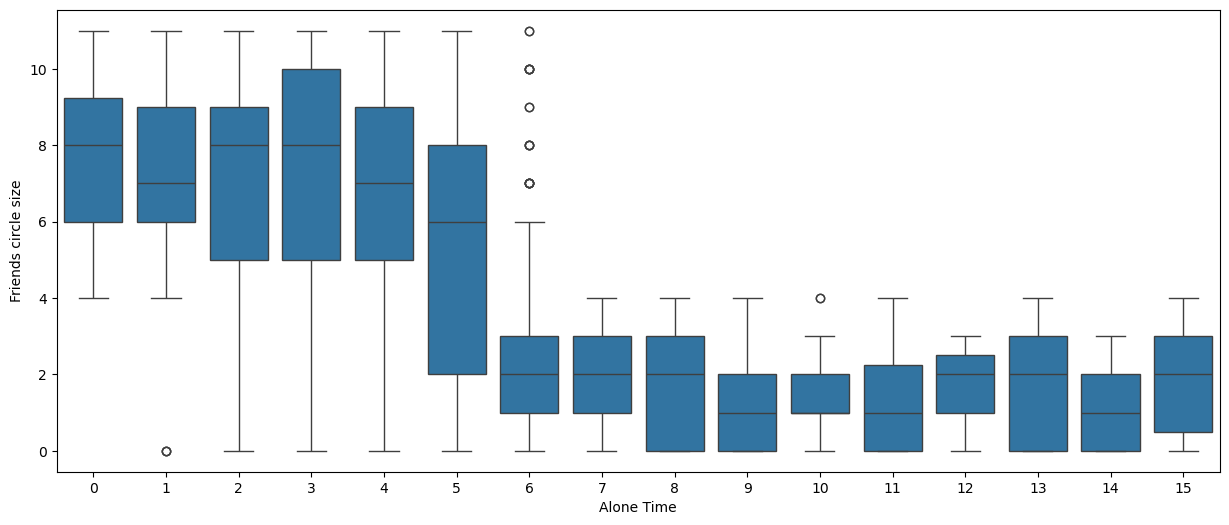

In [83]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=df,y='Time_spent_Alone',x='Friends_circle_size')
plt.xlabel("Alone Time")
plt.ylabel("Friends circle size")

Text(0, 0.5, 'Friends circle size')

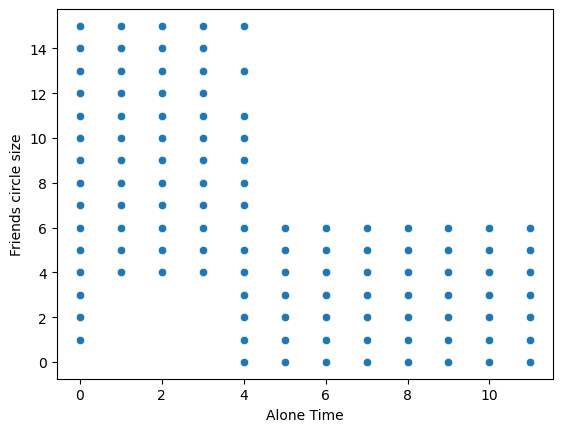

In [84]:
sns.scatterplot(data=df,x='Time_spent_Alone',y='Friends_circle_size')
plt.xlabel("Alone Time")
plt.ylabel("Friends circle size")

In [85]:
df['Friends_circle_size'].mean()

6.589171974522293

Having a larger friend circle or more number of friends than average can indicate less alone time 

Text(0, 0.5, 'Alone Time')

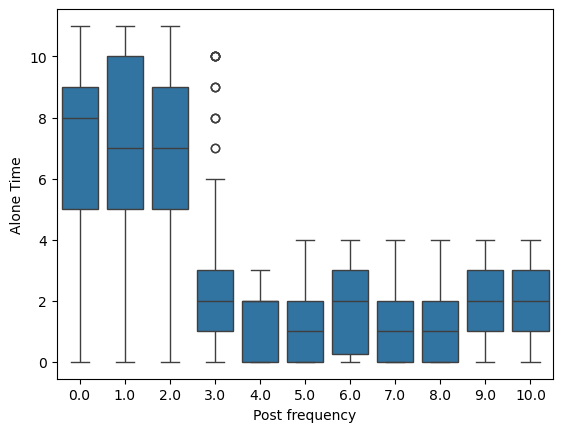

In [86]:
sns.boxplot(data=df,y='Time_spent_Alone',x='Post_frequency')
plt.xlabel("Post frequency")
plt.ylabel("Alone Time")

A trend similar as the trend of friends circle size can be observed for post frequency with time spent alone

In [87]:
df['Stage_fear'].value_counts()

Stage_fear
No     1421
Yes    1091
Name: count, dtype: int64

In [88]:
df['Time_spent_Alone'].mean()

4.107085987261146

In [89]:
df[(df['Stage_fear']=='Yes') & (df['Time_spent_Alone']>4.10)].shape

(944, 8)

In [90]:
944/1091

0.8652612282309807

In [91]:
df[(df['Stage_fear']=='No')]['Time_spent_Alone'].mean()

1.6080225193525686

In [92]:
df[(df['Stage_fear']=='Yes')]['Time_spent_Alone'].mean()

7.362053162236481

Text(0.5, 0, 'Alone time')

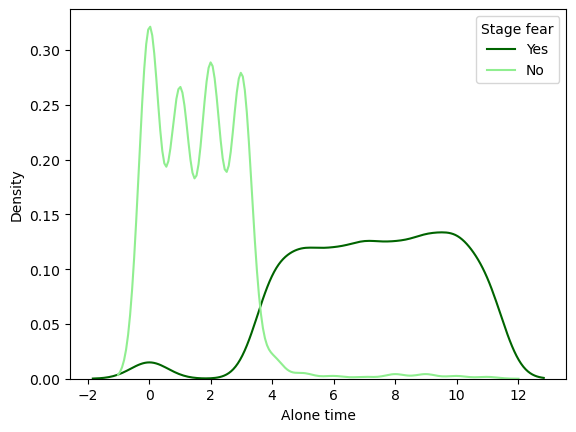

In [93]:
sns.kdeplot(df[df['Stage_fear']=='Yes']['Time_spent_Alone'],label='Yes',color='darkgreen')
sns.kdeplot(df[df['Stage_fear']=='No']['Time_spent_Alone'],label='No',color='lightgreen')
plt.legend(title='Stage fear')
plt.xlabel("Alone time")

Text(0, 0.5, 'Alone Time')

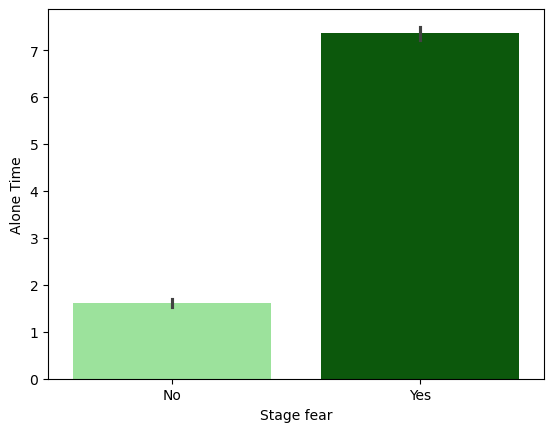

In [94]:
sns.barplot(data=df,x='Stage_fear',y='Time_spent_Alone',hue='Stage_fear',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)

plt.xlabel("Stage fear")
plt.ylabel("Alone Time")

People having stage fear are spending significantly alone time of an average of 7.3 hours. 86% people having stage fear are spending an alone time more than 4.1 hours which is the overall average 

In [95]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1423
Yes    1089
Name: count, dtype: int64

In [96]:
df['Time_spent_Alone'].mean()

4.107085987261146

In [97]:
df[(df['Drained_after_socializing']=='Yes') & (df['Time_spent_Alone']>4.10)].shape

(943, 8)

In [98]:
df[(df['Drained_after_socializing']=='Yes')]['Time_spent_Alone'].mean()

7.356290174471993

In [99]:
df[(df['Drained_after_socializing']=='No')]['Time_spent_Alone'].mean()

1.6205200281096275

Text(0.5, 0, 'Alone time')

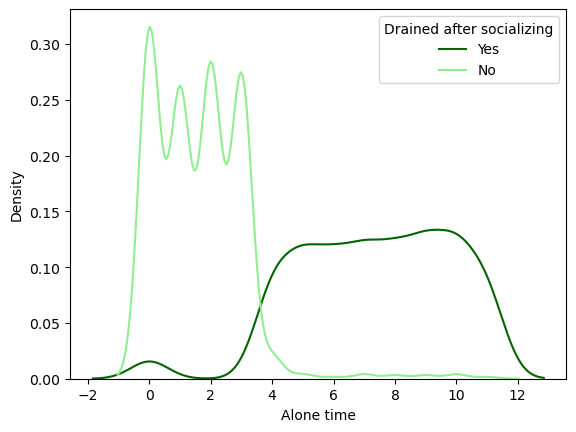

In [100]:
sns.kdeplot(df[df['Drained_after_socializing']=='Yes']['Time_spent_Alone'],label='Yes',color='darkgreen')
sns.kdeplot(df[df['Drained_after_socializing']=='No']['Time_spent_Alone'],label='No',color='lightgreen')
plt.legend(title='Drained after socializing')
plt.xlabel("Alone time")

Text(0, 0.5, 'Alone Time')

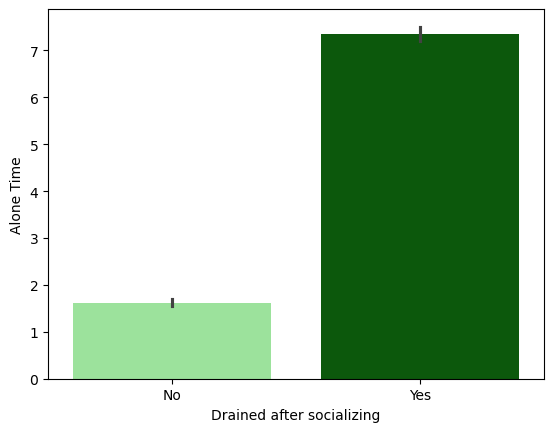

In [101]:
sns.barplot(data=df,x='Drained_after_socializing',y='Time_spent_Alone',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.xlabel("Drained after socializing")
plt.ylabel("Alone Time")

Similar trend as that of stage fear is observed 

----------------------

Text(0, 0.5, 'Social event attendance')

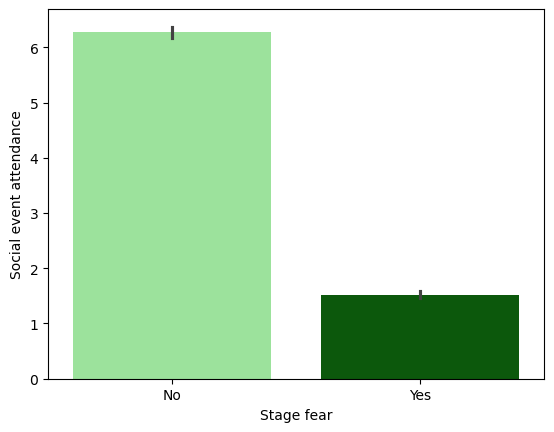

In [102]:
sns.barplot(data=df,x='Stage_fear',y='Social_event_attendance',hue='Stage_fear',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.xlabel("Stage fear")
plt.ylabel("Social event attendance")

Text(0.5, 0, 'Social event attendance')

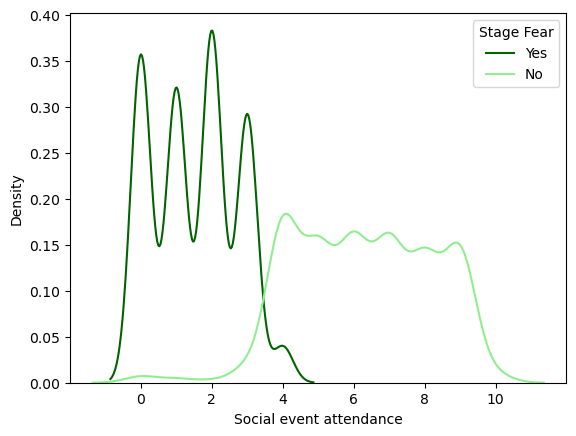

In [103]:
sns.kdeplot(df[df['Stage_fear']=='Yes']['Social_event_attendance'],label='Yes',color='darkgreen')
sns.kdeplot(df[df['Stage_fear']=='No']['Social_event_attendance'],label='No',color='lightgreen')
plt.legend(title='Stage Fear')
plt.xlabel("Social event attendance")

People not having stage fear are more likely to be present in more number of social events

Text(0, 0.5, 'Going outside')

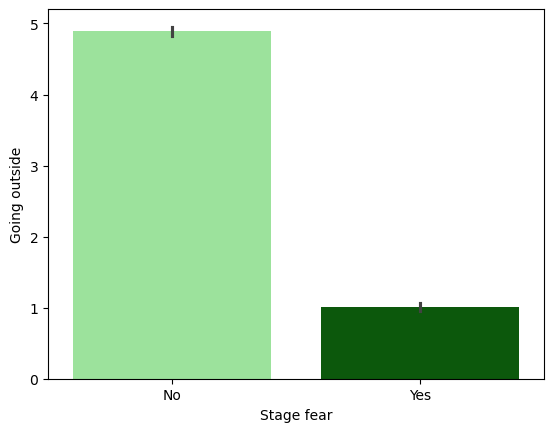

In [104]:
sns.barplot(data=df,x='Stage_fear',y='Going_outside',hue='Stage_fear',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.xlabel("Stage fear")
plt.ylabel("Going outside")

Text(0, 0.5, 'Friends circle size')

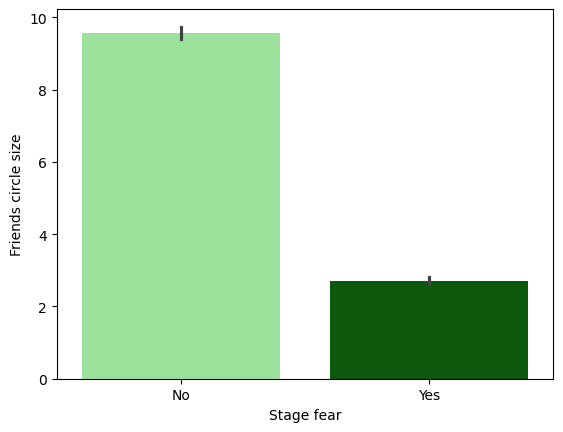

In [105]:
sns.barplot(data=df,x='Stage_fear',y='Friends_circle_size',hue='Stage_fear',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.xlabel("Stage fear")
plt.ylabel("Friends circle size")

Text(0, 0.5, 'Post frequency')

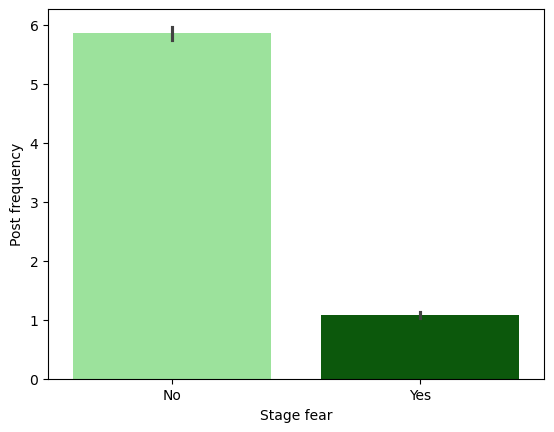

In [106]:
sns.barplot(data=df,x='Stage_fear',y='Post_frequency',hue='Stage_fear',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=False)
plt.xlabel("Stage fear")
plt.ylabel("Post frequency")

The trend of post frequency friend circle size and going outside with stage fear are similar to the trend of social attendance with social event attendance

Text(0.5, 0, 'Stage Fear')

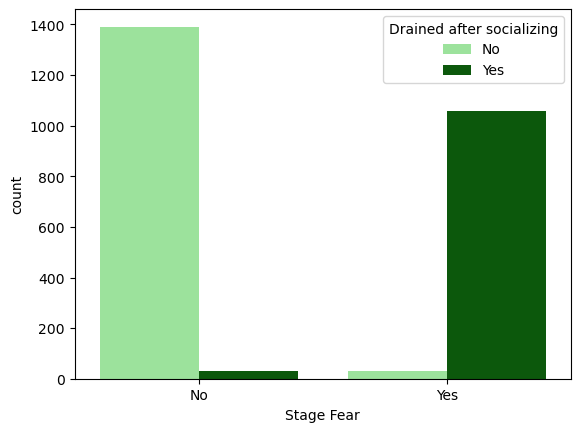

In [107]:
sns.countplot(data=df,x='Stage_fear',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             legend=True)
plt.legend(title='Drained after socializing')
plt.xlabel("Stage Fear")

In [108]:
df['Stage_fear'].value_counts()

Stage_fear
No     1421
Yes    1091
Name: count, dtype: int64

In [109]:
df[(df['Stage_fear']=='No') & (df['Drained_after_socializing']=='No')].shape

(1391, 8)

In [110]:
1391/1421

0.9788881069669247

In [111]:
df[(df['Stage_fear']=='Yes') & (df['Drained_after_socializing']=='No')].shape

(32, 8)

In [112]:
32/1091

0.02933088909257562

97.8 % people not having stage fear do not get drained by socialization and on the other hand the people not getting drained while having stage fear are just 2.9 % 

Text(0, 0.5, 'Going outside')

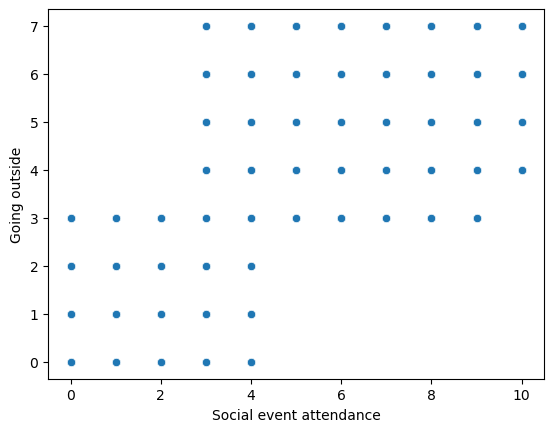

In [113]:
sns.scatterplot(data=df,x='Social_event_attendance',y='Going_outside')
plt.xlabel("Social event attendance")
plt.ylabel("Going outside")

Text(0, 0.5, 'Friends circle size')

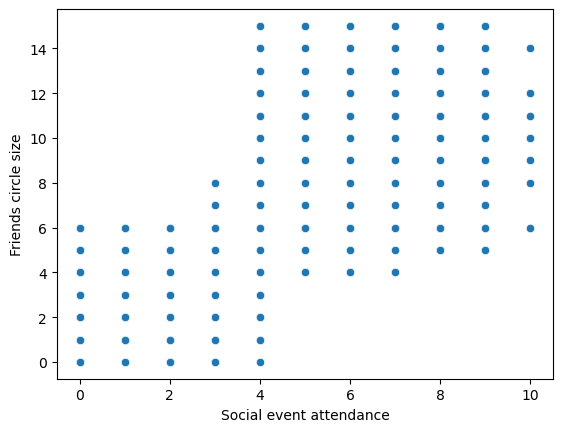

In [114]:
sns.scatterplot(data=df,x='Social_event_attendance',y='Friends_circle_size')
plt.xlabel("Social event attendance")
plt.ylabel("Friends circle size")

Text(0, 0.5, 'Post frequency')

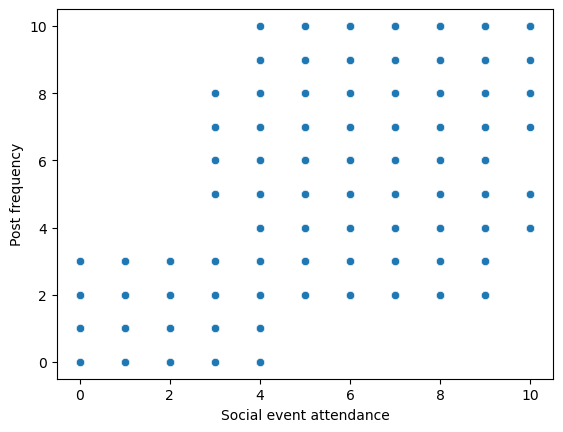

In [115]:
sns.scatterplot(data=df,x='Social_event_attendance',y='Post_frequency')
plt.xlabel("Social event attendance")
plt.ylabel("Post frequency")

Text(0, 0.5, 'Social event attendance')

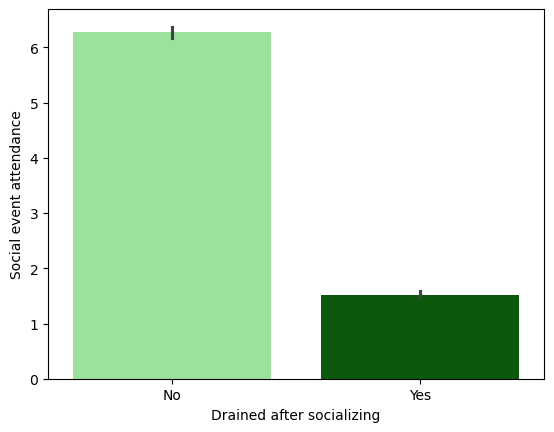

In [116]:
sns.barplot(data=df,x='Drained_after_socializing',y='Social_event_attendance',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             )
plt.xlabel("Drained after socializing")
plt.ylabel("Social event attendance")

In [117]:
df[df['Drained_after_socializing']=='No']['Social_event_attendance'].mean()

6.2733661278988055

In [118]:
df[df['Drained_after_socializing']=='Yes']['Social_event_attendance'].mean()

1.522497704315886

People attending more number of social events ,especially above 4, tend to post more, have larger friend circle and go out more often comparatively.
People not getting drained are having an average of 6.2 while the value is only 1.5 social events for people who are getting drained 

Text(0.5, 0, 'Going outside')

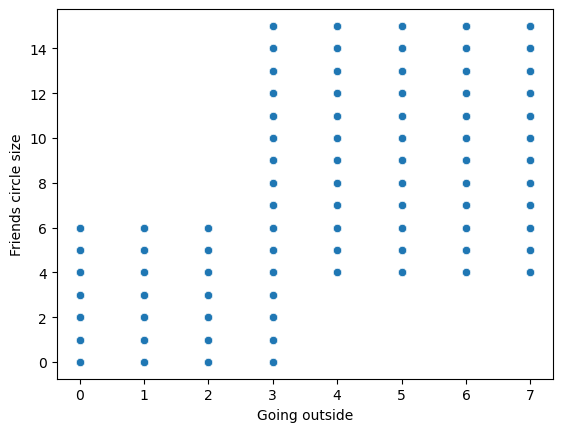

In [119]:
sns.scatterplot(data=df,x='Going_outside',y='Friends_circle_size')
plt.ylabel("Friends circle size")
plt.xlabel("Going outside")

Text(0, 0.5, 'Post frequency')

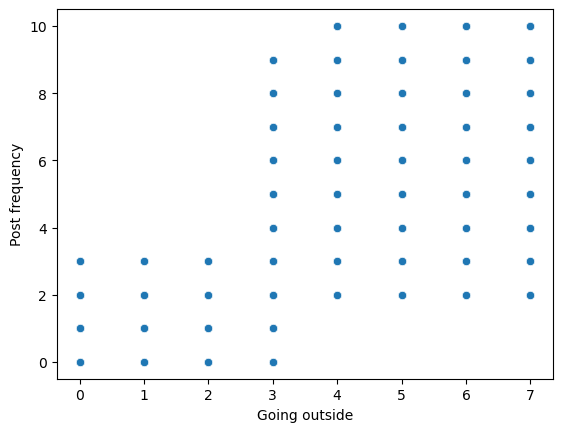

In [120]:
sns.scatterplot(data=df,x='Going_outside',y='Post_frequency')
plt.xlabel("Going outside")
plt.ylabel("Post frequency")

People going outside more than thrice are having more post frequency and larger friend circle

Text(0, 0.5, 'Going outside')

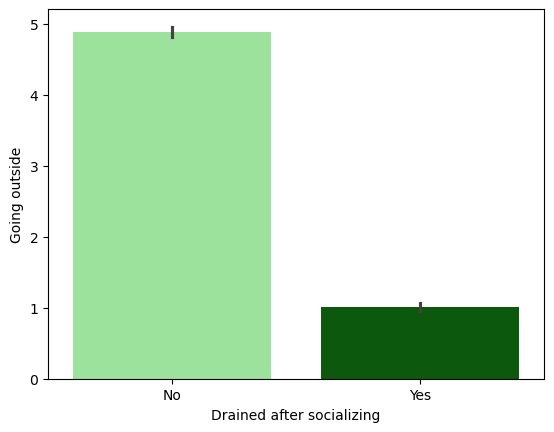

In [121]:
sns.barplot(data=df,x='Drained_after_socializing',y='Going_outside',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             )
plt.xlabel("Drained after socializing")
plt.ylabel("Going outside")

In [122]:
#drained

Text(0, 0.5, 'Friends circle size')

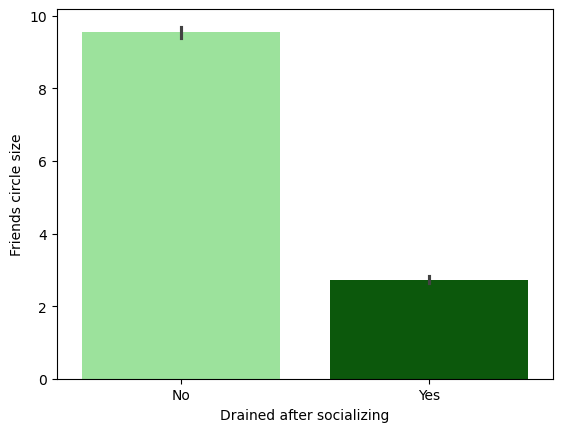

In [123]:
sns.barplot(data=df,x='Drained_after_socializing',y='Friends_circle_size',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             )
plt.xlabel("Drained after socializing")
plt.ylabel("Friends circle size")

Text(0, 0.5, 'Post frequency')

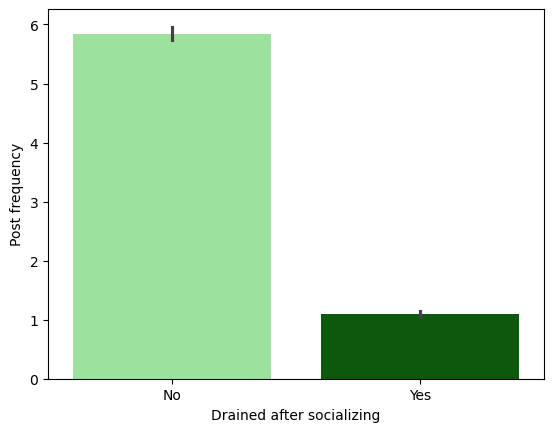

In [124]:
sns.barplot(data=df,x='Drained_after_socializing',y='Post_frequency',hue='Drained_after_socializing',palette={'No': 'lightgreen' , 'Yes': 'darkgreen'},
             )
plt.xlabel("Drained after socializing")
plt.ylabel("Post frequency")

People getting drained after socializing tend to post less, having lesser number of friends and have fewer outings

In [127]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2512.000000,2512.000000,2447.000000,2512.000000,2512.000000
mean,4.107086,4.213774,3.203923,6.589172,3.785430
std,3.465262,2.873699,2.245668,4.260626,2.926509
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## SUMMARY

The dataset contains 2900 rows of data of people with their personality type and other features such stage fear, friend circle size etc.

There are 8 features in total which have been mentioned below:

- Time_spent_Alone: 
  Number of hours an individual typically spends alone daily


- Stage_fear:
  Whether the person experiences stage fear


- Social_event_attendance:
Frequency (scale 0-10) of attending social events.


- Going_outside:
How often the individual goes outside (scale 0-10).


- Drained_after_socializing:
Whether the individual feels drained after socializing


- Friends_circle_size:
Number of close friends


- Post_frequency:
Frequency of posting on social media


- Personality:
Target variable: Introvert or Extrovert


Duplicated rows and missing values were present in the original dataset which had to be dropped and imputated. The modified dataset has 2512 rows.

- The dataset has a split of 43-56% between introverts and extroverts in personality types.

- Extroverts are spending lesser time alone as compared to introverts. On average,they stay alone only for 2.02 hours in contrast to 6.8 hours alone time of introverts.  

- 92% of people who have stage fear are introverts while the percentage is only 10% in the no fear category indicating if a person has stage fear the likeliness of him or her being an introvert is more. 

- Introverts tend to be less present in the social events and 90% of the people getting drained after socializing are introverts as well. 

- There are certain people who are introvert but yet attending comparatively more number of social events which could be due to the condition of mandatory attendance or an event of extreme importance.

- A similar trend as social event attendance is observed for post frequency and friend circle size with alone time.

- People attending more than average number of social events and even those who are going outside more than the average number of times have a mean of 1.5 hours of alone time. 

- Having a larger friend circle or more number of friends than average can indicate less alone time.

- People not having stage fear are more likely to be present in more number of social events.

- People attending more number of social events ,especially above 4, tend to post more, have larger friend circle and go out more often comparatively.